**ASSIGNMENT SUBMISSION DEADLINE: 29/08/2019**
- In this exercise, you will learn some basic image transformations by implementing a simplified Guassian Pyramid.
- The functions to be implemented are given in 'transform.py', along with the instructions and grade points for each function. 
- The test image is given in folder /inputs
- Sample outputs in numpy formats are provided in /outputs
- Most of these functions are available in buildin libraries, but you are not allowed to use them in this assignment.
- Apart from the coding, please answer the 3 question sections in this jupyter notebook. Please provide your answers succinctly.

**Attention**:
- Please use python with version = 3.5 (>3.5 should be OK).
- `numpy` is utilized for computation. use default data type, i.e., dtype='np.float64'.
- You do not need a GPU for this assignment. CPU is enough.
- To run this Jupyter notebook, you need to install the dependent libraries as stated in requirements.txt.
- Please run the notebook cell by cell.
- Please do not change the inputs arguments of the functions in py files, otherwise your implementation would fail to pass the test.
- After you implement one function, remember to restart the notebook kernel to help it recognize your fresh code.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.

In [9]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]


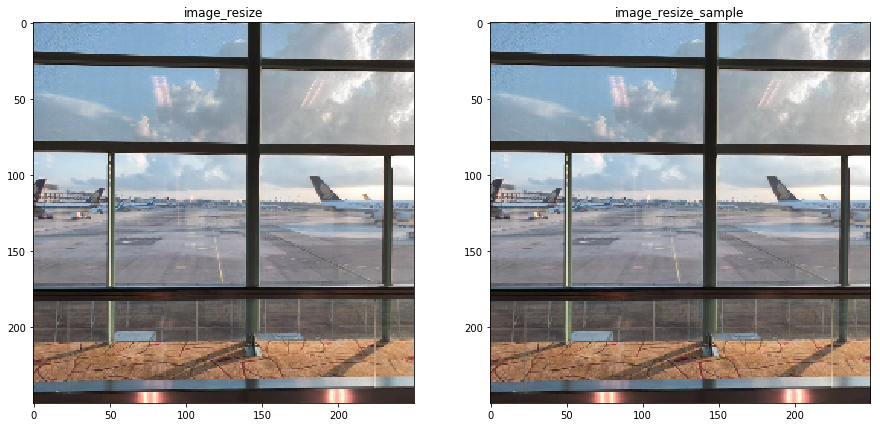

In [10]:
img = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
img_resize = cs4243_resize(img, 9,9)
print(img_resize)
"""
output:
[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]
"""

image = load_image('inputs/airport.jpg')
image_resize = cs4243_resize(image, 250, 250)

image_resize_sample_file = 'outputs/image_resize_sample_mac_linux.npy'
# np.save(image_resize_sample_file, image_resize)
image_resize_sample = np.load(image_resize_sample_file)


plt.subplot(121)
plt.title('image_resize')
plt.imshow(image_resize)
plt.subplot(122)
plt.title('image_resize_sample')
plt.imshow(image_resize_sample)


assert np.max(np.abs(image_resize_sample - image_resize)) < 1e-10, "Your solution is incorrect."



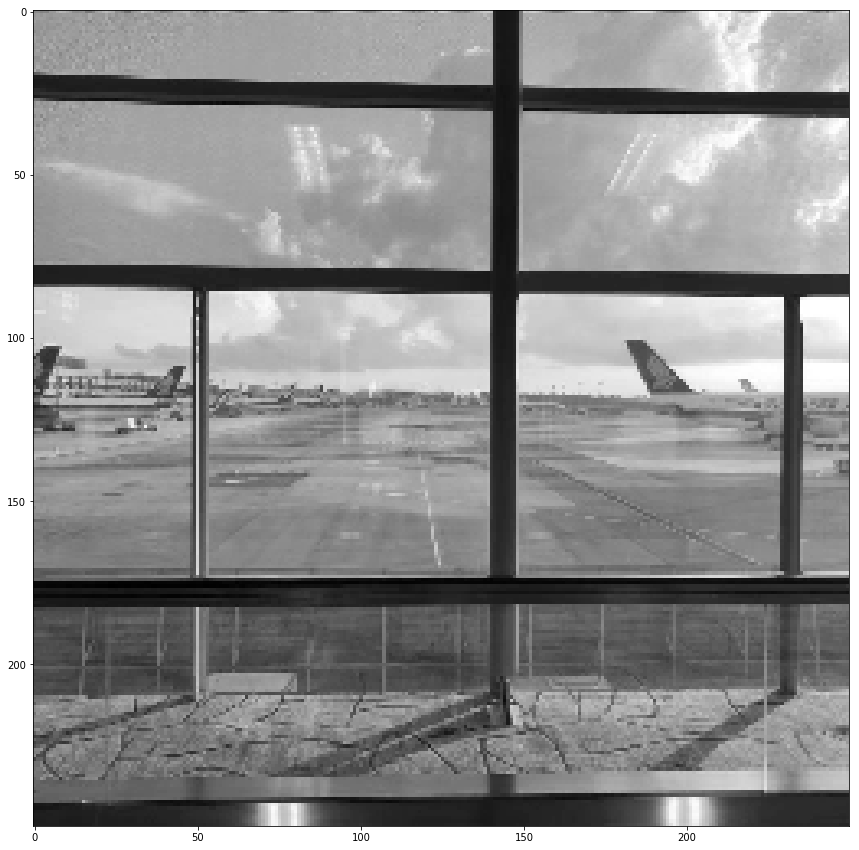

In [11]:
image_resize_sample_file = 'outputs/image_resize_sample.npy'
image_resize_sample = np.load(image_resize_sample_file)

image_grey = cs4243_rgb2grey(image_resize_sample)

plt.imshow(image_grey)
plt.show()

image_grey_sample_file = 'outputs/image_grey_sample.npy'
# np.save(image_grey_sample_file, image_grey)
image_grey_sample = np.load(image_grey_sample_file)
assert np.max(np.abs(image_grey_sample - image_grey)) < 1e-10, "Your solution is incorrect."



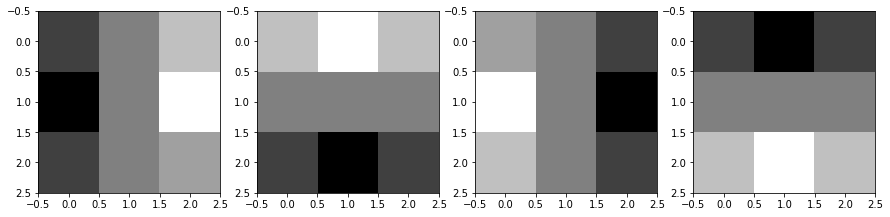

In [12]:
kernel_1 = np.array([[-1,0,1],[-2, 0, 2], [-1, 0, 0.5]])
kernel_2 = np.array([[1,2,1],[0, 0, 0], [-1, -2, -1]])
kernel_3 = cs4243_rotate180(kernel_1)
kernel_4 = cs4243_rotate180(kernel_2)

plt.subplot(141)
plt.imshow(kernel_1)

plt.subplot(142)
plt.imshow(kernel_2)

plt.subplot(143)
plt.imshow(kernel_3)

plt.subplot(144)
plt.imshow(kernel_4)
plt.show()

kernel_rotate_sample_file = 'outputs/kernel_rotate_sample.npy'
# np.save(kernel_rotate_sample_file, kernel_3)
kernel_rotate_sample = np.load(kernel_rotate_sample_file)
assert np.max(np.abs(kernel_rotate_sample - kernel_3)) < 1e-10, "Your solution is incorrect."

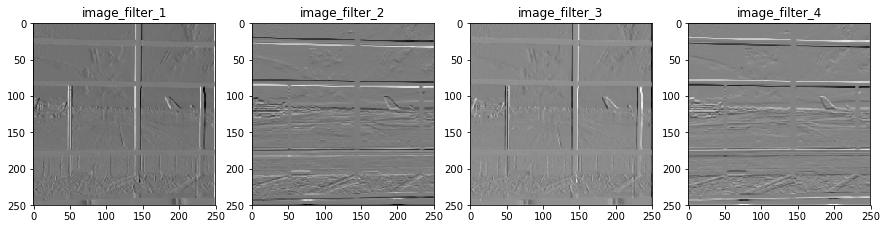

In [13]:
image_filter_1 = cs4243_filter(image_grey_sample, kernel_1)
image_filter_2 = cs4243_filter(image_grey_sample, kernel_2)
image_filter_3 = cs4243_filter(image_grey_sample, kernel_3)
image_filter_4 = cs4243_filter(image_grey_sample, kernel_4)

image_filter_sample_file = 'outputs/image_filter_sample.npy'
# np.save(image_filter_sample_file, image_filter_1)
image_filter_sample = np.load(image_filter_sample_file)

plt.subplot(141)
plt.imshow(image_filter_1)
plt.title('image_filter_1')

plt.subplot(142)
plt.imshow(image_filter_2)
plt.title('image_filter_2')

plt.subplot(143)
plt.imshow(image_filter_3)
plt.title('image_filter_3')

plt.subplot(144)
plt.imshow(image_filter_4)
plt.title('image_filter_4')

plt.show()


assert np.max(np.abs(image_filter_sample - image_filter_1)) < 1e-10, "Your solution is incorrect."



**Question** :
What is the difference between imge_filter_1 and image_filter_2? What kind of image features they can capture?

**Answer**: 
- same kernel rotated 90 Deg.
- the first captures horizontal differences, the second vertical ones

(20, 20)
Same kernel.


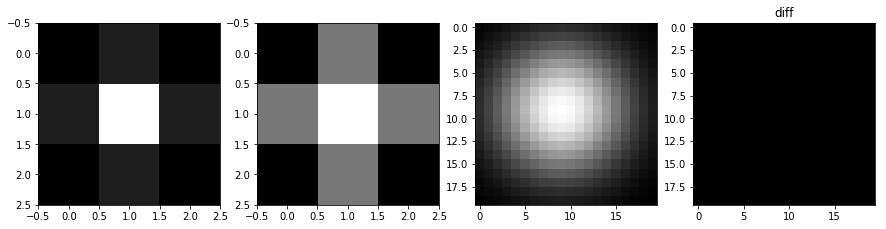

In [14]:
kernel_sig05 = cs4243_guassian_kernel(3, 0.5)
kernel_sig2 = cs4243_guassian_kernel(3, 2)
kernel_ks20_sig5 = cs4243_guassian_kernel(20, 5)
print(kernel_ks20_sig5.shape)
kernel_sig2_rotate = cs4243_rotate180(kernel_sig2)
if np.max(np.abs(kernel_sig2 - kernel_sig2_rotate)) < 1e-10:
    print("Same kernel.")

guassian_kernel_sample_file = 'outputs/guassian_kernel_sample.npy'
# np.save(guassian_kernel_sample_file, kernel_ks20_sig5)
guassian_kernel_sample = np.load(guassian_kernel_sample_file)

plt.subplot(141)
plt.imshow(kernel_sig05)

plt.subplot(142)
plt.imshow(kernel_sig2)

plt.subplot(143)
plt.imshow(kernel_ks20_sig5)

plt.subplot(144)
plt.title('diff')
plt.imshow(np.abs(guassian_kernel_sample - kernel_ks20_sig5))
plt.show()

assert np.max(np.abs(guassian_kernel_sample - kernel_ks20_sig5)) < 1e-10, "Your solution is incorrect."

Native 4 nested loop: 0.7740631103515625
Fast version: 0.49724888801574707
Faster version: 0.36519575119018555


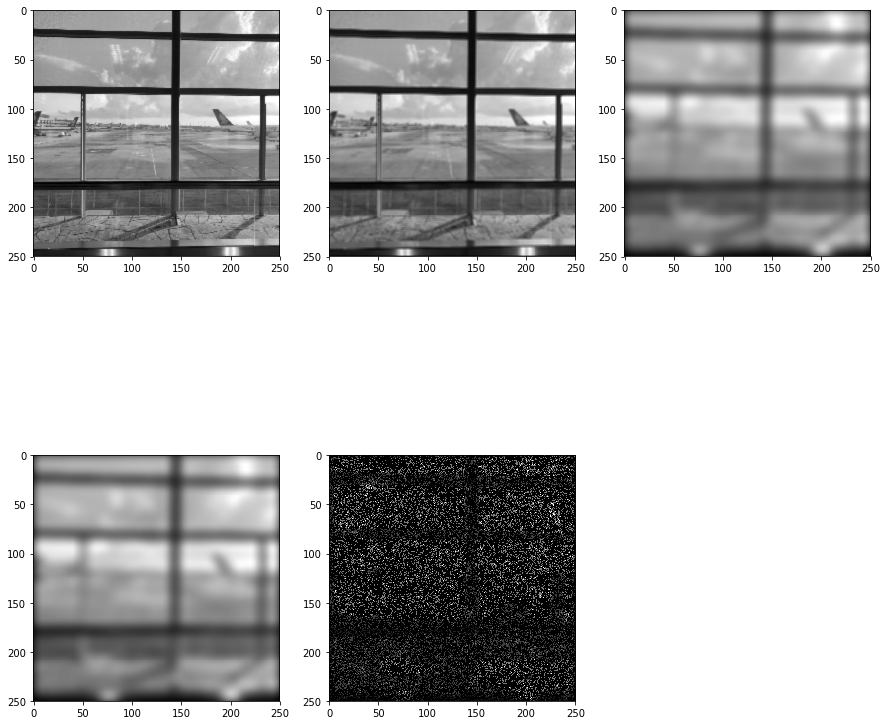

Absolute difference: 2.220446049250313e-16
(array([  0,   0,   0, ..., 249, 249, 249]), array([  2,   9,  12, ..., 241, 243, 249]))


In [15]:
import time

t1 = time.time()
image_filter_sig05 = cs4243_filter(image_grey, kernel_sig05)
t2 = time.time()
image_filter_sig2 = cs4243_filter_fast(image_grey, kernel_sig2)
t3 = time.time()
image_filter_ks20_sig5 = cs4243_filter_faster(image_grey, kernel_ks20_sig5)
t4 = time.time()

print('Native 4 nested loop: {}'.format(t2-t1))
print('Fast version: {}'.format(t3-t2))
print('Faster version: {}'.format(t4-t3))

image_filter_fast_sample_file = 'outputs/image_filter_fast_sample.npy'
# np.save(image_filter_fast_sample_file, image_filter_sig2)
image_filter_fast_sample = np.load(image_filter_fast_sample_file)

image_filter_faster_sample_file = 'outputs/image_filter_faster_sample.npy'
# np.save(image_filter_faster_sample_file, image_filter_ks20_sig5)
image_filter_faster_sample = np.load(image_filter_faster_sample_file)

plt.subplot(231)
plt.imshow(image_filter_sig05)

plt.subplot(232)
plt.imshow(image_filter_sig2)

plt.subplot(233)
plt.imshow(image_filter_ks20_sig5)

plt.subplot(234)
plt.imshow(image_filter_faster_sample)

plt.subplot(235)
plt.imshow(np.abs(image_filter_faster_sample - image_filter_ks20_sig5))
plt.show()


assert np.max(image_filter_fast_sample - image_filter_sig2) < 1e-10, "Your solution is incorrect."

#print(image_filter_ks20_sig5[0])
#print(image_filter_faster_sample[0])

print('Absolute difference: {}'.format(np.max(np.abs(image_filter_faster_sample - image_filter_ks20_sig5))))
print(np.nonzero(np.abs(image_filter_faster_sample - image_filter_ks20_sig5)))
assert np.max(np.abs(image_filter_faster_sample - image_filter_ks20_sig5)) < 1e-10, "Your solution is incorrect."



**Questions**:
    Why do we need to rotate the kernel by 180 before doing matrix multiplication in convolutional operation, is it necessary for Guassian kernel?

**Answer**:
- Rotation is required by the definition of a convolution f * g
- However in the case of the gaussian kernel, it's point symmtric to the center. Therefore rotation by 180Deg does not make a difference.

[[1 3]
 [7 9]]


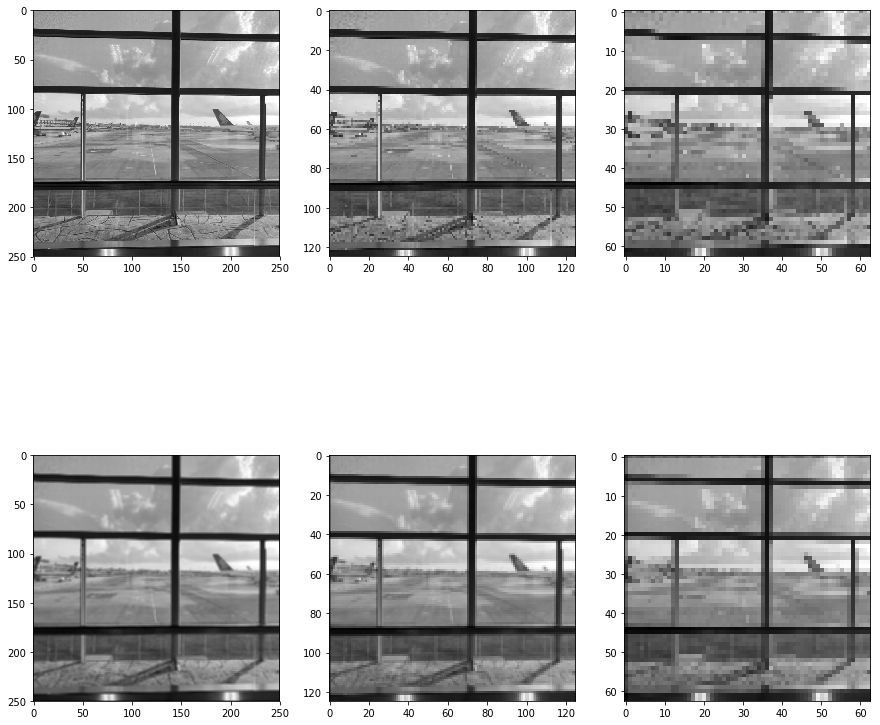

In [16]:
image_ds0 = cs4243_downsample(image_grey, 2)
image_ds1 = cs4243_downsample(image_grey, 4)
image_ds2 = cs4243_downsample(image_filter_sig2, 2)
image_ds4 = cs4243_downsample(image_filter_sig2, 4)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = cs4243_downsample(A, 2)
print(B)


plt.subplot(231)
plt.imshow(image_grey)
plt.subplot(232)
plt.imshow(image_ds0)
plt.subplot(233)
plt.imshow(image_ds1)

plt.subplot(234)
plt.imshow(image_filter_sig2)
plt.subplot(235)
plt.imshow(image_ds2)
plt.subplot(236)
plt.imshow(image_ds4)

image_down_sample_file = 'outputs/image_down_sample.npy'
# np.save(image_down_sample_file, image_ds2)
image_down_sample = np.load(image_down_sample_file)
assert np.max(np.abs(image_down_sample - image_ds2)) < 1e-10, "Your solution is incorrect."

**Question**: 
What are the differences between images down sampled from the original image and the Guassian filtered image? Why do we need to do Guassian filtering before down sample the image?

**Answer**:
the gaussian filtered images are smoother and dont's suffer from aliasing. Therefore we usually filter the image before downsampling, as it prevents jagged edges. 
Jagged edges are caused by sharp contrasts in the downsampled images.
--> converting low frequency features to high frequency ones